# Data processing
## This notebook's goal is to load the latest data available on the server and transform it into the predictions-ready dataset.

In [1]:
import pandas
import psycopg2


conn = psycopg2.connect(
					dbname='dota_ai_od',
					user='limited_user',
					password='*removed*',
					host='*azure*',
					port='5432')


df = pandas.read_sql_query('SELECT * FROM match_stats', conn)

conn.close()

df.head(100)

C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\1650869432.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('SELECT * FROM match_stats', conn)


,match_id,player_id,hero_id,player_q_mmr_diff,player_hero_winrate_overall,player_hero_total_matches_played,dire_winrate_all_time,dire_games_played_all_time,radiant_winrate_all_time,radiant_games_played_all_time,...,player_kda_average_all_matches,player_gold_per_min_average_all_matches,player_xp_per_min_average_all_matches,player_last_hits_average_all_matches,player_denies_average_all_matches,player_lane_efficiency_pct_average_all_matches,player_level_average_all_matches,player_hero_damage_average_all_matches,player_tower_damage_average_all_matches,player_hero_healing_average_all_matches
0,7398770906,363104336,54,-154,0.500000,4,0.528902,346,0.503817,393,...,3.598904,485.67390,646.56160,218.672530,6.129905,58.000000,22.418133,25706.640,4187.8290,1387.58410
1,7398770906,204634639,100,154,0.425532,47,0.484536,291,0.523659,317,...,2.871168,506.05590,617.30096,219.271380,10.601974,-1.000000,21.203947,26286.182,3272.3770,292.71817
2,7398770906,144595206,36,-462,0.522523,333,0.451723,3221,0.518507,3134,...,3.794689,428.49127,511.25775,154.889850,3.544611,48.090908,19.895042,21030.770,2199.0884,1010.48010
3,7398770906,167763814,84,-308,0.574257,101,0.476417,2311,0.515651,2364,...,2.888229,472.09882,601.87573,212.931760,8.986952,52.659092,21.980106,26996.150,3835.8015,821.89020
4,7398770906,1514889200,85,0,0.586956,46,0.440476,504,0.564482,473,...,2.631269,421.72876,600.52510,115.022514,6.226203,51.500000,20.888433,24024.646,2021.9086,1486.29810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7418150617,385421629,76,-1371,0.304348,23,0.432558,645,0.488263,639,...,2.687196,420.49690,555.47894,157.140960,9.809190,57.823530,20.677570,23462.953,2814.0103,677.59247
96,7418150617,879201523,138,15,0.593750,64,0.474562,1199,0.545673,1248,...,3.214838,461.55374,612.78710,196.587250,7.744176,46.766666,21.827135,26742.734,3418.1833,864.68750
97,7418150617,136311244,137,1401,0.620690,29,0.466310,1870,0.532011,1765,...,2.794652,407.96698,504.09875,136.277850,5.446767,46.733334,19.354332,22418.746,2971.1018,913.62010
98,7418150617,136561541,99,477,0.285714,21,0.477300,1674,0.527369,1699,...,2.949505,426.63030,502.23096,142.919360,5.069967,49.384617,19.670620,18656.275,2082.7998,522.66380


In [8]:
player_ranks_to_mmr_dict = {
  "Herald IW": [1, 1],
  "Herald I": [1, 154],
  "Herald II": [154, 308],
  "Herald III": [308, 462],
  "Herald IV": [462, 616],
  "Herald V": [616, 769],
  "Guardian IW": [770, 770],
  "Guardian I": [770, 924],
  "Guardian II": [924, 1078],
  "Guardian III": [1078, 1232],
  "Guardian IV": [1232, 1386],
  "Guardian V": [1386, 1540],
  "Crusader IW": [1540, 1540],
  "Crusader I": [1540, 1694],
  "Crusader II": [1694, 1848],
  "Crusader III": [1848, 2002],
  "Crusader IV": [2002, 2156],
  "Crusader V": [2156, 2310],
  "Archon IW": [2310, 2310],
  "Archon I": [2310, 2464],
  "Archon II": [2464, 2618],
  "Archon III": [2618, 2772],
  "Archon IV": [2772, 2926],
  "Archon V": [2926, 3080],
  "Legend IW": [3080, 3080],
  "Legend I": [3080, 3234],
  "Legend II": [3234, 3388],
  "Legend III": [3388, 3542],
  "Legend IV": [3542, 3696],
  "Legend V": [3696, 3850],
  "Ancient IW": [3850, 3850],
  "Ancient I": [3850, 4004],
  "Ancient II": [4004, 4158],
  "Ancient III": [4158, 4312],
  "Ancient IV": [4312, 4466],
  "Ancient V": [4466, 4620],
  "Divine IW": [4620, 4620],
  "Divine I": [4620, 4820],
  "Divine II": [4820, 5020],
  "Divine III": [5020, 5220],
  "Divine IV": [5220, 5420],
  "Divine V": [5420, 5620],
  "Immortal IW": [5621, 5621],
  "Immortal I": [5622, 5820],
  "Immortal II": [5820, 6020],
  "Immortal III": [6020, 6320],
  "Immortal IV": [6320, 6620]
}

## Examining the data for relations

         match_id   player_id  hero_id  player_q_mmr_diff  \
0      7398770906   363104336       54               -154   
1      7398770906   204634639      100                154   
2      7398770906   144595206       36               -462   
3      7398770906   167763814       84               -308   
4      7398770906  1514889200       85                  0   
...           ...         ...      ...                ...   
31985  7416934507    79500883       91               1124   
31986  7416934507   125459453       23               -570   
31987  7416934507   207831949       74                 46   
31988  7416934507   146355030       35               -262   
31989  7416934507   142656137        6               -416   

       player_hero_winrate_overall  player_hero_total_matches_played  \
0                         0.500000                                 4   
1                         0.425532                                47   
2                         0.522523                 

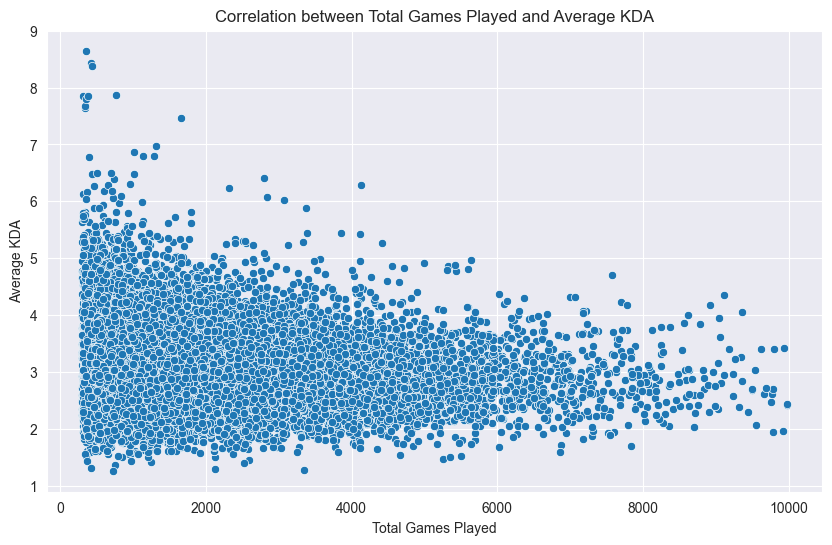

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


def transform_to_mmr(player_rank):
	return sum(player_ranks_to_mmr_dict[player_rank]) / 2

def seconds_to_hours(seconds):
    return seconds / 3600.0 

df['player_match_rank_initial_mmr'] = df['player_match_rank_initial'].apply(transform_to_mmr)

df = df[(df['player_all_matches_played_number'] >= 300) & (df['player_all_matches_played_number'] <= 10000)]

max_matches_played = df.groupby('player_id')['player_all_matches_played_number'].max().reset_index()
max_matches_played.columns = ['player_id', 'max_played_matches']

df = df.merge(max_matches_played, on='player_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='max_played_matches', y='player_kda_average_all_matches')
plt.title('Correlation between Total Games Played and Average KDA')
plt.xlabel('Total Games Played')
plt.ylabel('Average KDA')
plt.grid(True)
plt.show()

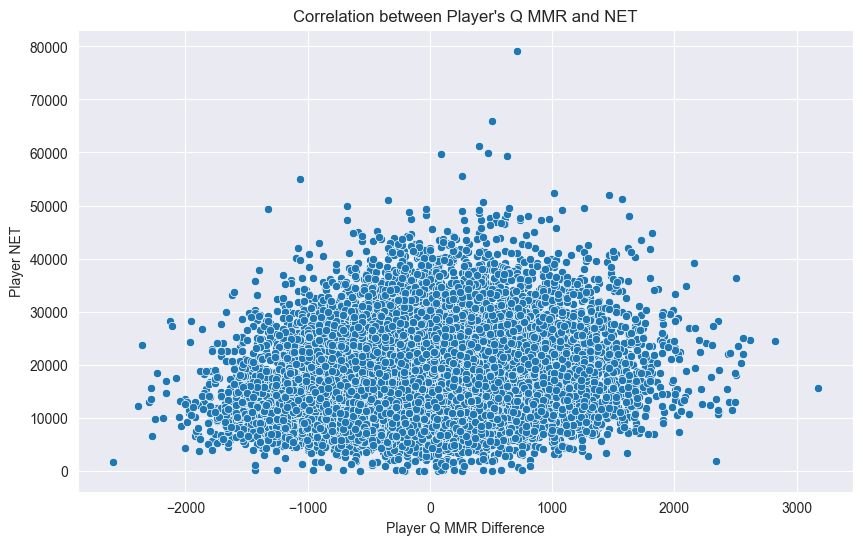

In [5]:
df['player_kda'] = (df['player_kills_number'] + df['player_assists_number']) / df['player_deaths_number'].replace(0, 1)

df = df[df['player_kda'] <= 5]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='player_q_mmr_diff', y='player_net')
plt.title("Correlation between Player's Q MMR and NET")
plt.xlabel("Player Q MMR Difference")
plt.ylabel("Player NET")
plt.grid(True)
plt.show()

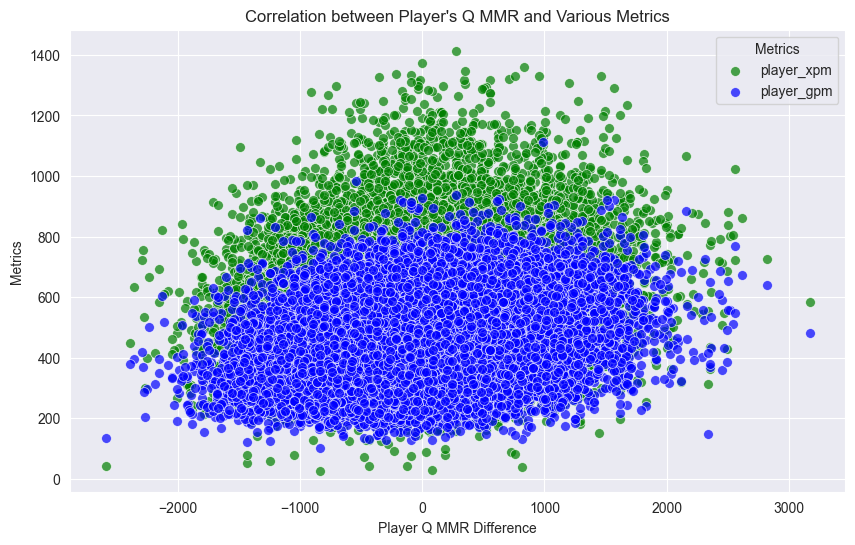

In [6]:
variables = ['player_xpm', 'player_gpm']
colors = ['green', 'blue']

plt.figure(figsize=(10, 6))
for var, color in zip(variables, colors):
    sns.scatterplot(data=df, x='player_q_mmr_diff', y=var, color=color, alpha=0.7, s=50, label=var)
plt.title("Correlation between Player's Q MMR and Various Metrics")
plt.xlabel("Player Q MMR Difference")
plt.ylabel("Metrics")
plt.grid(True)
plt.legend(title='Metrics')
plt.show()

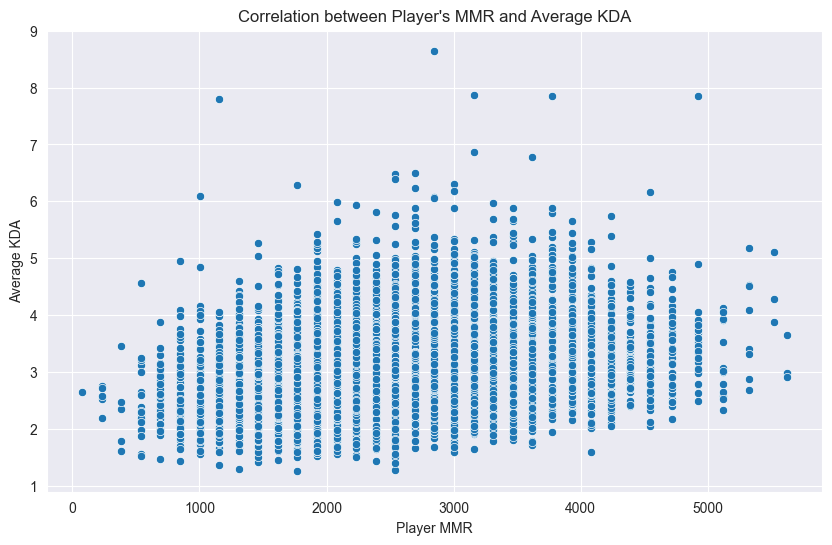

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='player_match_rank_initial_mmr', y='player_kda_average_all_matches')
plt.title("Correlation between Player's MMR and Average KDA")
plt.xlabel("Player MMR")
plt.ylabel("Average KDA")
plt.grid(True)
plt.show()

### Summary

From the examples above we can confirm that Dota 2 is indeed a quite balanced game, since there're hardly any linear relations between data pairs (in unprocessed dataset that is).

## Here starts the preprocessing

### Loading the data

In [2]:
import pandas as pd
import psycopg2

def transform_to_mmr(player_rank):
    return sum(player_ranks_to_mmr_dict[player_rank]) / 2

query = """
    SELECT
    ms.*,
    h.name_local as hero_name_local,
    h.hero_pickrate_average,
    h.hero_winrate_average,
    h.hero_pickrate_up_to_crusader,
    h.hero_winrate_up_to_crusader,
    h.hero_pickrate_archon,
    h.hero_winrate_archon,
    h.hero_pickrate_legend,
    h.hero_winrate_legend,
    h.hero_pickrate_ancient,
    h.hero_winrate_ancient,
    h.hero_pickrate_divine_immortal,
    h.hero_winrate_divine_immortal,
    m.datetime as match_datetime,
    m.radiant_win as match_radiant_win,
    m.duration as match_duration,
    m.radiant_score as match_radiant_score,
    m.dire_score as match_dire_score
FROM
    match_stats ms
JOIN
    heroes h ON ms.hero_id = h.id
JOIN
    matches m ON ms.match_id = m.id;

"""

conn = psycopg2.connect(
                    dbname='dota_ai_od',
                    user='limited_user',
                    password='*removed*',
                    host='*azure*',
                    port='5432')


df = pandas.read_sql_query(query, conn)

df['player_side'] = df['player_side'].astype('category')


conn.close()

C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\191291423.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(query, conn)


### Inspecting data's shape and state

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   match_id                                        48870 non-null  object        
 1   player_id                                       48870 non-null  object        
 2   hero_id                                         48870 non-null  int64         
 3   player_q_mmr_diff                               48870 non-null  int64         
 4   player_hero_winrate_overall                     48870 non-null  float64       
 5   player_hero_total_matches_played                48870 non-null  int64         
 6   dire_winrate_all_time                           48870 non-null  float64       
 7   dire_games_played_all_time                      48870 non-null  int64         
 8   radiant_winrate_all_time                      

In [4]:
df.describe()

,hero_id,player_q_mmr_diff,player_hero_winrate_overall,player_hero_total_matches_played,dire_winrate_all_time,dire_games_played_all_time,radiant_winrate_all_time,radiant_games_played_all_time,player_heroes_pick_confidence_score_allies,player_heroes_pick_confidence_score_enemies,...,hero_pickrate_legend,hero_winrate_legend,hero_pickrate_ancient,hero_winrate_ancient,hero_pickrate_divine_immortal,hero_winrate_divine_immortal,match_datetime,match_duration,match_radiant_score,match_dire_score
count,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,...,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870,48870.000000,48870.000000,48870.000000
mean,56.624944,-0.003704,0.513108,113.753202,0.476490,1645.861572,0.533395,1645.172458,0.062615,0.083364,...,10.691476,49.911243,10.325605,49.816521,9.523514,49.606505,2024-01-01 12:57:44.158174976,2477.489871,38.958461,38.706159
min,1.000000,-2635.000000,0.000000,1.000000,0.166667,6.000000,0.285714,7.000000,-5.000000,-6.000000,...,0.969000,43.288300,1.266300,44.870400,1.936000,45.328900,2023-10-21 21:27:27,403.000000,1.000000,0.000000
25%,26.000000,-416.000000,0.460546,23.000000,0.461292,750.000000,0.518641,747.000000,0.000000,-1.000000,...,6.970100,48.005900,6.016100,48.222800,5.776400,48.247900,2023-11-30 16:02:12,2066.000000,29.000000,28.000000
50%,51.000000,-31.000000,0.517241,52.000000,0.473636,1390.000000,0.531292,1391.500000,0.000000,0.000000,...,9.914800,50.235900,9.782600,49.669700,8.235000,49.275300,2023-12-23 12:18:47,2416.000000,40.000000,40.000000
75%,85.000000,416.000000,0.571429,118.000000,0.488597,2260.000000,0.545616,2266.000000,0.000000,1.000000,...,13.464200,51.745200,13.025300,51.414900,12.175900,50.987700,2024-02-11 13:40:32,2810.000000,49.000000,49.000000
max,138.000000,3172.000000,1.000000,7250.000000,0.818182,15156.000000,0.820000,15377.000000,5.000000,9.000000,...,28.809500,54.873700,29.417900,54.915900,26.108000,55.560800,2024-04-06 14:38:02,7235.000000,89.000000,86.000000
std,36.422747,664.004112,0.117331,216.732009,0.026383,1190.215327,0.026564,1189.004421,0.813748,1.349702,...,5.486950,2.298722,5.347236,2.166313,5.068404,1.951953,NaN,598.623991,13.704602,14.658611


### Fixing datatypes and categories

In [5]:
df['match_id'] = df['match_id'].astype('int64')
df['player_nickname'] = df['player_nickname'].astype(str)
df['player_side'] = df['player_side'].astype('category')
df['player_lasthits'] = df['player_lasthits'].astype('int64')
df['player_denies'] = df['player_denies'].astype('int64')
df['hero_name_local'] = df['hero_name_local'].astype(str)
df['player_match_rank_initial'] = df['player_match_rank_initial'].astype('category')
df['player_id'] = df['player_id'].astype('int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   match_id                                        48870 non-null  int64         
 1   player_id                                       48870 non-null  int64         
 2   hero_id                                         48870 non-null  int64         
 3   player_q_mmr_diff                               48870 non-null  int64         
 4   player_hero_winrate_overall                     48870 non-null  float64       
 5   player_hero_total_matches_played                48870 non-null  int64         
 6   dire_winrate_all_time                           48870 non-null  float64       
 7   dire_games_played_all_time                      48870 non-null  int64         
 8   radiant_winrate_all_time                      

### Converting player rank to MMR score and fixing all coefficients-based rate columns to be percent-based

In [9]:
df['player_match_rank_initial_mmr'] = df['player_match_rank_initial'].apply(transform_to_mmr)
df['player_match_rank_initial_mmr'] = df['player_match_rank_initial_mmr'].astype('float64')


winrate_columns = [col for col in df.columns if 'winrate' in col.lower() and 'hero' not in col.lower()]
pickrate_columns = [col for col in df.columns if 'pickrate' in col.lower() and 'hero' not in col.lower()]

df[winrate_columns] *= 100
df[pickrate_columns] *= 100

df['player_hero_winrate_overall'] *= 100

df.head(100)

,match_id,player_id,hero_id,player_q_mmr_diff,player_hero_winrate_overall,player_hero_total_matches_played,dire_winrate_all_time,dire_games_played_all_time,radiant_winrate_all_time,radiant_games_played_all_time,...,hero_pickrate_ancient,hero_winrate_ancient,hero_pickrate_divine_immortal,hero_winrate_divine_immortal,match_datetime,match_radiant_win,match_duration,match_radiant_score,match_dire_score,player_match_rank_initial_mmr
0,7398770906,363104336,54,-154,50.000000,4,52.890176,346,50.381680,393,...,19.0338,54.9159,19.3351,53.8362,2023-10-25 14:14:53,False,3175,55,54,1925.0
1,7398770906,204634639,100,154,42.553192,47,48.453608,291,52.365930,317,...,6.1267,47.2815,7.5739,48.2371,2023-10-25 14:14:53,False,3175,55,54,2233.0
2,7398770906,144595206,36,-462,52.252250,333,45.172307,3221,51.850670,3134,...,8.2786,49.4327,5.0972,47.9513,2023-10-25 14:14:53,False,3175,55,54,1617.0
3,7398770906,167763814,84,-308,57.425743,101,47.641712,2311,51.565146,2364,...,9.6141,50.8513,6.1195,49.6469,2023-10-25 14:14:53,False,3175,55,54,1771.0
4,7398770906,1514889200,85,0,58.695650,46,44.047618,504,56.448203,473,...,6.5329,52.2018,6.5435,50.8980,2023-10-25 14:14:53,False,3175,55,54,2079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7418150617,385421629,76,-1371,30.434780,23,43.255815,645,48.826292,639,...,6.7161,50.0457,6.1592,49.4761,2023-11-04 17:03:13,True,1616,39,17,692.5
96,7418150617,879201523,138,15,59.375000,64,47.456214,1199,54.567310,1248,...,3.5713,45.5668,3.6903,47.0845,2023-11-04 17:03:13,True,1616,39,17,2079.0
97,7418150617,136311244,137,1401,62.068963,29,46.631017,1870,53.201133,1765,...,5.2408,47.5735,7.0162,49.2753,2023-11-04 17:03:13,True,1616,39,17,3465.0
98,7418150617,136561541,99,477,28.571430,21,47.729987,1674,52.736900,1699,...,5.7045,50.0346,5.3149,50.0514,2023-11-04 17:03:13,True,1616,39,17,2541.0


### Aggregating heroes_pick_confidence scores, introducing hero-pick/win-rate for players' rank, aggregating match result to simplify further aggregation tasks

In [10]:
def get_hero_pickrate_winrate_for_rank(group):
    closest_player_idx = group['player_q_mmr_diff'].abs().idxmin()

    closest_player_rank = group.loc[closest_player_idx, 'player_match_rank_initial'].split(' ')[0]
    
    if closest_player_rank.lower() in ['herald', 'guardian', 'crusader']:
      closest_player_rank = 'up_to_crusader'

    pickrate_column = f'hero_pickrate_{closest_player_rank.lower()}'
    winrate_column = f'hero_winrate_{closest_player_rank.lower()}'
    group['hero_pickrate_for_rank'] = group[pickrate_column]
    group['hero_winrate_for_rank'] = group[winrate_column]
    
    return group

df_with_pickrate = df.groupby('match_id').apply(get_hero_pickrate_winrate_for_rank)

df_with_pickrate['player_heroes_pick_confidence_score_total'] = df_with_pickrate['player_heroes_pick_confidence_score_allies'] + df_with_pickrate['player_heroes_pick_confidence_score_enemies']
df_with_pickrate['player_matches_abandonment_rate'] = (df_with_pickrate['player_matches_abandoned'] / df_with_pickrate['player_all_matches_played_number']) * 100


df_with_pickrate.reset_index(drop=True, inplace=True)

df_with_pickrate['has_team_won'] = df_with_pickrate.groupby(['match_id', 'player_side'])['player_has_won'].transform('first')

C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\1974297312.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_with_pickrate = df.groupby('match_id').apply(get_hero_pickrate_winrate_for_rank)
C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\1974297312.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_with_pickrate['has_team_won'] = df_with_pickrate.groupby(['match_id', 'player_side'])['player_has_won'].transform('first')


In [11]:
df_with_pickrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 69 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   match_id                                        48870 non-null  int64         
 1   player_id                                       48870 non-null  int64         
 2   hero_id                                         48870 non-null  int64         
 3   player_q_mmr_diff                               48870 non-null  int64         
 4   player_hero_winrate_overall                     48870 non-null  float64       
 5   player_hero_total_matches_played                48870 non-null  int64         
 6   dire_winrate_all_time                           48870 non-null  float64       
 7   dire_games_played_all_time                      48870 non-null  int64         
 8   radiant_winrate_all_time                      

### Applying team-level aggregations

In [12]:
aggregation_rules = {
    'player_q_mmr_diff': 'sum',
    'player_hero_winrate_overall': 'mean',
    'player_hero_total_matches_played': 'sum',
    'dire_winrate_all_time': 'mean',
    'dire_games_played_all_time': 'mean',
    'radiant_winrate_all_time': 'mean',
    'radiant_games_played_all_time': 'mean',
    'player_heroes_pick_confidence_score_allies': 'sum',
    'player_heroes_pick_confidence_score_enemies': 'sum',
    'player_heroes_pick_confidence_score_total': 'sum',
    'player_time_played_all_matches': 'mean',
    'player_winrate_over_time': 'mean',
    'player_all_matches_played_number': 'mean',
    'player_matches_abandonment_rate': 'mean',
    'player_matches_lost': 'mean',
    'player_matches_won': 'mean',
    'player_match_rank_initial_mmr': 'mean',
    'player_xpm': 'sum',
    'player_gpm': 'sum',
    'player_denies': 'sum',
    'player_lasthits': 'sum',
    'player_net': 'sum',
    'player_assists_number': 'sum',
    'player_deaths_number': 'sum',
    'player_kills_number': 'sum',
    'hero_lvl': 'mean',
    'player_kda_average_all_matches': 'mean',
    'hero_pickrate_average': 'mean',
    'hero_winrate_average': 'mean',
    'hero_pickrate_for_rank': 'mean',
    'hero_winrate_for_rank': 'mean',
    'player_match_rank_initial': lambda x: list(x), 
    'has_team_won': 'first', 
    'player_id': lambda x: list(x),
    'hero_id': lambda x: list(x),
    'match_id': 'first',
    'player_side': 'first'
}

df_grouped = df_with_pickrate.groupby(['match_id', 'player_side'], as_index=False).agg(aggregation_rules)

C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\2258878487.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_with_pickrate.groupby(['match_id', 'player_side'], as_index=False).agg(aggregation_rules)


In [13]:
df_grouped.head(100)

,player_q_mmr_diff,player_hero_winrate_overall,player_hero_total_matches_played,dire_winrate_all_time,dire_games_played_all_time,radiant_winrate_all_time,radiant_games_played_all_time,player_heroes_pick_confidence_score_allies,player_heroes_pick_confidence_score_enemies,player_heroes_pick_confidence_score_total,...,hero_pickrate_average,hero_winrate_average,hero_pickrate_for_rank,hero_winrate_for_rank,player_match_rank_initial,has_team_won,player_id,hero_id,match_id,player_side
0,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,-8,-5,-13,...,12.109864,51.709536,12.19228,51.75542,"[Archon III, Archon I, Divine II, Legend V, Ar...",True,"[72916732, 53809244, 73170089, 28382176, 20044...","[50, 47, 23, 54, 123]",7393031014,Dire
1,-574,47.181973,79,50.284437,678.8,53.365365,667.2,0,-2,-2,...,7.195048,49.892812,8.02234,50.12888,"[Ancient IV, Ancient I, Crusader III, Archon I...",False,"[273191424, 205252195, 126983953, 143733567, 5...","[36, 95, 29, 84, 58]",7393031014,Radiant
2,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,4,1,5,...,12.379212,50.544244,11.69992,50.61900,"[Archon I, Archon II, Legend IV, Legend III, A...",True,"[166829155, 185609875, 881287122, 234691019, 2...","[123, 121, 23, 13, 54]",7393139706,Dire
3,-537,47.111782,130,52.414330,1078.2,54.705929,1088.0,0,0,0,...,9.818488,49.561488,10.38858,49.21444,"[Crusader V, Archon V, Crusader IV, Archon V, ...",False,"[168352898, 299921151, 356518944, 132549973, 1...","[103, 74, 7, 104, 70]",7393139706,Radiant
4,156,53.353821,397,51.947757,868.6,54.523794,867.2,0,20,20,...,9.986016,49.871348,9.28904,49.47356,"[Ancient I, Legend II, Archon I, Archon III, C...",True,"[324195237, 467210572, 1095896142, 1190129029,...","[137, 74, 112, 48, 23]",7393178003,Dire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,56.572041,865,47.257991,2589.6,54.339965,2556.6,0,-1,-1,...,8.979896,49.200320,9.04174,49.16864,"[Legend I, Archon V, Legend II, Archon IV, Anc...",True,"[142109201, 136941135, 154420147, 179644306, 1...","[81, 87, 17, 63, 30]",7394472602,Radiant
96,-695,48.976564,652,47.617544,1708.8,52.257526,1679.8,0,6,6,...,9.564616,50.417192,11.06644,51.15174,"[Archon III, Archon II, Archon I, Archon IV, C...",False,"[141426035, 191697772, 301413018, 346947815, 3...","[40, 44, 101, 36, 42]",7394477114,Dire
97,691,49.644955,442,46.566006,1712.6,52.850261,1714.8,0,2,2,...,9.513520,48.962524,9.88252,48.60396,"[Archon V, Legend III, Archon II, Crusader V, ...",True,"[139141240, 160513239, 302728423, 396296805, 3...","[62, 39, 41, 99, 71]",7394477114,Radiant
98,308,45.381417,301,46.356714,1438.6,51.576693,1424.8,-1,12,11,...,9.300064,48.373368,8.59622,47.66298,"[Crusader III, Crusader IV, Crusader I, Crusad...",False,"[139632377, 137422153, 408102079, 143055131, 1...","[72, 41, 121, 71, 39]",7394479019,Dire


In [14]:
df_grouped.columns

Index(['player_q_mmr_diff', 'player_hero_winrate_overall',
       'player_hero_total_matches_played', 'dire_winrate_all_time',
       'dire_games_played_all_time', 'radiant_winrate_all_time',
       'radiant_games_played_all_time',
       'player_heroes_pick_confidence_score_allies',
       'player_heroes_pick_confidence_score_enemies',
       'player_heroes_pick_confidence_score_total',
       'player_time_played_all_matches', 'player_winrate_over_time',
       'player_all_matches_played_number', 'player_matches_abandonment_rate',
       'player_matches_lost', 'player_matches_won',
       'player_match_rank_initial_mmr', 'player_xpm', 'player_gpm',
       'player_denies', 'player_lasthits', 'player_net',
       'player_assists_number', 'player_deaths_number', 'player_kills_number',
       'hero_lvl', 'player_kda_average_all_matches', 'hero_pickrate_average',
       'hero_winrate_average', 'hero_pickrate_for_rank',
       'hero_winrate_for_rank', 'player_match_rank_initial', 'has_team_

### Renaming the columns to accurately represent aggregated data

In [15]:
column_mapping = {
    'player_q_mmr_diff': 'team_q_mmr_diff_sum',
    'player_hero_winrate_overall': 'team_heroes_winrate_overall_mean',
    'player_hero_total_matches_played': 'team_heroes_total_matches_played_sum',
    'dire_winrate_all_time': 'team_players_dire_winrate_all_time_mean',
    'dire_games_played_all_time': 'team_players_dire_games_played_all_time_mean',
    'radiant_winrate_all_time': 'team_players_radiant_winrate_all_time_mean',
    'radiant_games_played_all_time': 'team_players_radiant_games_played_all_time_mean',
    'player_heroes_pick_confidence_score_allies': 'team_heroes_pick_confidence_score_allies_sum',
    'player_heroes_pick_confidence_score_enemies': 'team_heroes_pick_confidence_score_enemies_sum',
    'player_heroes_pick_confidence_score_total': 'team_heroes_pick_confidence_score_total_sum',
    'player_time_played_all_matches': 'team_players__time_played_all_matches_mean',
    'player_winrate_over_time': 'team_players_winrate_over_time_mean',
    'player_all_matches_played_number': 'team_players_all_matches_played_number_mean',
    'player_matches_abandonment_rate': 'team_players_matches_abandonment_rate_mean',
    'player_matches_lost': 'team_players_matches_lost_mean',
    'player_matches_won': 'team_players_matches_won_mean',
    'player_match_rank_initial_mmr': 'team_players_match_rank_initial_mmr_mean',
    'player_xpm': 'team_players_xpm_sum',
    'player_gpm': 'team_players_gpm_sum',
    'player_denies': 'team_players_denies_sum',
    'player_lasthits': 'team_players_lasthits_sum',
    'player_net': 'team_players_net_sum',
    'player_assists_number': 'team_players_assists_number_sum',
    'player_deaths_number': 'team_player_deaths_number_sum',
    'player_kills_number': 'team_players_kills_number_sum',
    'hero_lvl': 'team_hero_lvls_mean',
    'player_kda_average_all_matches': 'team_players_kda_average_all_matches_mean',
    'hero_pickrate_average': 'team_heroes_pickrate_average_mean',
    'hero_winrate_average': 'team_heroes_winrate_average_mean',
    'hero_pickrate_for_rank': 'team_heroes_pickrate_for_rank_mean',
    'hero_winrate_for_rank': 'team_heroes_winrate_for_rank_mean',
    'player_match_rank_initial': 'team_players_match_ranks_initial',  
    'player_id': 'team_players_id_list',
    'hero_id': 'team_heroes_id_list',
    'player_side': 'team_side'
}

df_grouped.rename(columns=column_mapping, inplace=True)

In [16]:
df_grouped.head(100)

,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,team_heroes_pick_confidence_score_total_sum,...,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean,team_players_match_ranks_initial,has_team_won,team_players_id_list,team_heroes_id_list,match_id,team_side
0,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,-8,-5,-13,...,12.109864,51.709536,12.19228,51.75542,"[Archon III, Archon I, Divine II, Legend V, Ar...",True,"[72916732, 53809244, 73170089, 28382176, 20044...","[50, 47, 23, 54, 123]",7393031014,Dire
1,-574,47.181973,79,50.284437,678.8,53.365365,667.2,0,-2,-2,...,7.195048,49.892812,8.02234,50.12888,"[Ancient IV, Ancient I, Crusader III, Archon I...",False,"[273191424, 205252195, 126983953, 143733567, 5...","[36, 95, 29, 84, 58]",7393031014,Radiant
2,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,4,1,5,...,12.379212,50.544244,11.69992,50.61900,"[Archon I, Archon II, Legend IV, Legend III, A...",True,"[166829155, 185609875, 881287122, 234691019, 2...","[123, 121, 23, 13, 54]",7393139706,Dire
3,-537,47.111782,130,52.414330,1078.2,54.705929,1088.0,0,0,0,...,9.818488,49.561488,10.38858,49.21444,"[Crusader V, Archon V, Crusader IV, Archon V, ...",False,"[168352898, 299921151, 356518944, 132549973, 1...","[103, 74, 7, 104, 70]",7393139706,Radiant
4,156,53.353821,397,51.947757,868.6,54.523794,867.2,0,20,20,...,9.986016,49.871348,9.28904,49.47356,"[Ancient I, Legend II, Archon I, Archon III, C...",True,"[324195237, 467210572, 1095896142, 1190129029,...","[137, 74, 112, 48, 23]",7393178003,Dire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1,56.572041,865,47.257991,2589.6,54.339965,2556.6,0,-1,-1,...,8.979896,49.200320,9.04174,49.16864,"[Legend I, Archon V, Legend II, Archon IV, Anc...",True,"[142109201, 136941135, 154420147, 179644306, 1...","[81, 87, 17, 63, 30]",7394472602,Radiant
96,-695,48.976564,652,47.617544,1708.8,52.257526,1679.8,0,6,6,...,9.564616,50.417192,11.06644,51.15174,"[Archon III, Archon II, Archon I, Archon IV, C...",False,"[141426035, 191697772, 301413018, 346947815, 3...","[40, 44, 101, 36, 42]",7394477114,Dire
97,691,49.644955,442,46.566006,1712.6,52.850261,1714.8,0,2,2,...,9.513520,48.962524,9.88252,48.60396,"[Archon V, Legend III, Archon II, Crusader V, ...",True,"[139141240, 160513239, 302728423, 396296805, 3...","[62, 39, 41, 99, 71]",7394477114,Radiant
98,308,45.381417,301,46.356714,1438.6,51.576693,1424.8,-1,12,11,...,9.300064,48.373368,8.59622,47.66298,"[Crusader III, Crusader IV, Crusader I, Crusad...",False,"[139632377, 137422153, 408102079, 143055131, 1...","[72, 41, 121, 71, 39]",7394479019,Dire


### Reordering for convenience

In [17]:
desired_columns = ['match_id', 'team_side', 'has_team_won'] + [col for col in df_grouped.columns if col not in ['match_id', 'team_side', 'has_team_won']]

df_grouped = df_grouped.reindex(columns=desired_columns)

df_grouped.head(100)

,match_id,team_side,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,...,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean,team_players_match_ranks_initial,team_players_id_list,team_heroes_id_list
0,7393031014,Dire,True,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,...,39,17.6,2.860394,12.109864,51.709536,12.19228,51.75542,"[Archon III, Archon I, Divine II, Legend V, Ar...","[72916732, 53809244, 73170089, 28382176, 20044...","[50, 47, 23, 54, 123]"
1,7393031014,Radiant,False,-574,47.181973,79,50.284437,678.8,53.365365,667.2,...,7,13.2,3.336084,7.195048,49.892812,8.02234,50.12888,"[Ancient IV, Ancient I, Crusader III, Archon I...","[273191424, 205252195, 126983953, 143733567, 5...","[36, 95, 29, 84, 58]"
2,7393139706,Dire,True,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,...,47,27.2,2.439241,12.379212,50.544244,11.69992,50.61900,"[Archon I, Archon II, Legend IV, Legend III, A...","[166829155, 185609875, 881287122, 234691019, 2...","[123, 121, 23, 13, 54]"
3,7393139706,Radiant,False,-537,47.111782,130,52.414330,1078.2,54.705929,1088.0,...,41,26.2,3.725120,9.818488,49.561488,10.38858,49.21444,"[Crusader V, Archon V, Crusader IV, Archon V, ...","[168352898, 299921151, 356518944, 132549973, 1...","[103, 74, 7, 104, 70]"
4,7393178003,Dire,True,156,53.353821,397,51.947757,868.6,54.523794,867.2,...,47,26.8,3.202784,9.986016,49.871348,9.28904,49.47356,"[Ancient I, Legend II, Archon I, Archon III, C...","[324195237, 467210572, 1095896142, 1190129029,...","[137, 74, 112, 48, 23]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7394472602,Radiant,True,-1,56.572041,865,47.257991,2589.6,54.339965,2556.6,...,34,14.8,3.452598,8.979896,49.200320,9.04174,49.16864,"[Legend I, Archon V, Legend II, Archon IV, Anc...","[142109201, 136941135, 154420147, 179644306, 1...","[81, 87, 17, 63, 30]"
96,7394477114,Dire,False,-695,48.976564,652,47.617544,1708.8,52.257526,1679.8,...,29,19.4,3.350149,9.564616,50.417192,11.06644,51.15174,"[Archon III, Archon II, Archon I, Archon IV, C...","[141426035, 191697772, 301413018, 346947815, 3...","[40, 44, 101, 36, 42]"
97,7394477114,Radiant,True,691,49.644955,442,46.566006,1712.6,52.850261,1714.8,...,52,23.4,3.009189,9.513520,48.962524,9.88252,48.60396,"[Archon V, Legend III, Archon II, Crusader V, ...","[139141240, 160513239, 302728423, 396296805, 3...","[62, 39, 41, 99, 71]"
98,7394479019,Dire,False,308,45.381417,301,46.356714,1438.6,51.576693,1424.8,...,67,27.8,2.776132,9.300064,48.373368,8.59622,47.66298,"[Crusader III, Crusader IV, Crusader I, Crusad...","[139632377, 137422153, 408102079, 143055131, 1...","[72, 41, 121, 71, 39]"


### Preparations and data-inspections before final aggregations

In [18]:
exclude_columns = ['team_players_match_ranks_initial', 'team_players_id_list', 'team_heroes_id_list']

df_grouped.reset_index()
df_grouped = df_grouped.drop(columns=exclude_columns)

In [19]:
df = df_grouped.groupby(['match_id', 'team_side', 'has_team_won'])

df.head(100)

C:\Users\nicky\AppData\Local\Temp\ipykernel_18484\1133126122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df_grouped.groupby(['match_id', 'team_side', 'has_team_won'])


,match_id,team_side,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,Dire,True,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,...,80665,95,10,39,17.6,2.860394,12.109864,51.709536,12.19228,51.75542
1,7393031014,Radiant,False,-574,47.181973,79,50.284437,678.8,53.365365,667.2,...,38527,11,40,7,13.2,3.336084,7.195048,49.892812,8.02234,50.12888
2,7393139706,Dire,True,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,...,137211,115,41,47,27.2,2.439241,12.379212,50.544244,11.69992,50.61900
3,7393139706,Radiant,False,-537,47.111782,130,52.414330,1078.2,54.705929,1088.0,...,111534,87,48,41,26.2,3.725120,9.818488,49.561488,10.38858,49.21444
4,7393178003,Dire,True,156,53.353821,397,51.947757,868.6,54.523794,867.2,...,146438,89,45,47,26.8,3.202784,9.986016,49.871348,9.28904,49.47356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,7672540315,Radiant,False,-152,37.777747,462,47.544383,1414.8,53.634568,1433.8,...,118606,119,57,51,27.0,2.856675,13.593464,48.839604,14.86364,48.97988
9770,7672568516,Dire,True,1079,55.130643,291,48.044726,872.4,54.338121,850.4,...,112235,65,35,34,25.0,2.970711,10.007436,49.276804,10.43602,49.37070
9771,7672568516,Radiant,False,-1077,52.272129,243,47.693450,1717.2,52.610578,1654.4,...,90841,76,34,34,22.2,3.362975,9.656836,49.423976,10.01914,49.49094
9772,7672827105,Dire,False,-926,47.080352,370,45.914343,1030.4,52.607596,990.2,...,59333,54,41,28,17.4,3.236435,14.786756,49.476768,15.25452,49.45122


In [20]:
result = df.sum().unstack(fill_value=0)

result.head(100)

team_q_mmr_diff_sum        \
has_team_won                       False True    
match_id   team_side                             
7393031014 Dire                        0   573   
           Radiant                  -574     0   
7393139706 Dire                        0   541   
           Radiant                  -537     0   
7393178003 Dire                        0   156   
...                                  ...   ...   
7394472602 Radiant                     0    -1   
7394477114 Dire                     -695     0   
           Radiant                     0   691   
7394479019 Dire                      308     0   
           Radiant                     0  -308   

                     team_heroes_winrate_overall_mean             \
has_team_won                                    False      True    
match_id   team_side                                               
7393031014 Dire                              0.000000  58.167405   
           Radiant                          47.181973   0.000000   
7393139706 Dire                              0.000000  47.413676   
           Radiant                          47.111782   0.000000   
7393178003 Dire                              0.000000  53.353821   
...                                               ...        ...   
7394472602 Radiant                           0.000000  56.572041   
7394477114 Dire                             48.976564   0.000000   
           Radiant                           0.000000  49.644955   
7394479019 Dire                             45.381417   0.000000   
           Radiant                           0.000000  52.191919   

                     team_heroes_total_matches_played_sum        \
has_team_won                                        False True    
match_id   team_side                                              
7393031014 Dire                                         0  1072   
           Radiant                                     79     0   
7393139706 Dire                                         0   321   
           Radiant                                    130     0   
7393178003 Dire                                         0   397   
...                                                   ...   ...   
7394472602 Radiant                                      0   865   
7394477114 Dire                                       652     0   
           Radiant                                      0   442   
7394479019 Dire                                       301     0   
           Radiant                                      0   310   

                     team_players_dire_winrate_all_time_mean             \
has_team_won                                           False      True    
match_id   team_side                                                      
7393031014 Dire                                     0.000000  48.786208   
           Radiant                                 50.284437   0.000000   
7393139706 Dire                                     0.000000  48.928907   
           Radiant                                 52.414330   0.000000   
7393178003 Dire                                     0.000000  51.947757   
...                                                      ...        ...   
7394472602 Radiant                                  0.000000  47.257991   
7394477114 Dire                                    47.617544   0.000000   
           Radiant                                  0.000000  46.566006   
7394479019 Dire                                    46.356714   0.000000   
           Radiant                                  0.000000  44.809311   

                     team_players_dire_games_played_all_time_mean          \
has_team_won                                                False   True    
match_id   team_side                                                        
7393031014 Dire                                               0.0  2206.8   
           Radiant                                          678.8    

In [21]:
print(list(column_mapping.values()))

['team_q_mmr_diff_sum', 'team_heroes_winrate_overall_mean', 'team_heroes_total_matches_played_sum', 'team_players_dire_winrate_all_time_mean', 'team_players_dire_games_played_all_time_mean', 'team_players_radiant_winrate_all_time_mean', 'team_players_radiant_games_played_all_time_mean', 'team_heroes_pick_confidence_score_allies_sum', 'team_heroes_pick_confidence_score_enemies_sum', 'team_heroes_pick_confidence_score_total_sum', 'team_players__time_played_all_matches_mean', 'team_players_winrate_over_time_mean', 'team_players_all_matches_played_number_mean', 'team_players_matches_abandonment_rate_mean', 'team_players_matches_lost_mean', 'team_players_matches_won_mean', 'team_players_match_rank_initial_mmr_mean', 'team_players_xpm_sum', 'team_players_gpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum', 'team_players_net_sum', 'team_players_assists_number_sum', 'team_player_deaths_number_sum', 'team_players_kills_number_sum', 'team_hero_lvls_mean', 'team_players_kda_average_a

In [22]:
columns_to_subtract = ['team_q_mmr_diff_sum', 'team_heroes_winrate_overall_mean', 'team_heroes_total_matches_played_sum', 'team_players_dire_winrate_all_time_mean', 'team_players_dire_games_played_all_time_mean', 'team_players_radiant_winrate_all_time_mean', 'team_players_radiant_games_played_all_time_mean', 'team_heroes_pick_confidence_score_allies_sum', 'team_heroes_pick_confidence_score_enemies_sum', 'team_heroes_pick_confidence_score_total_sum', 'team_players__time_played_all_matches_mean', 'team_players_winrate_over_time_mean', 'team_players_all_matches_played_number_mean', 'team_players_matches_abandonment_rate_mean', 'team_players_matches_lost_mean', 'team_players_matches_won_mean', 'team_players_match_rank_initial_mmr_mean', 'team_players_xpm_sum', 'team_players_gpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum', 'team_players_net_sum', 'team_players_assists_number_sum', 'team_player_deaths_number_sum', 'team_players_kills_number_sum', 'team_hero_lvls_mean', 'team_players_kda_average_all_matches_mean', 'team_heroes_pickrate_average_mean', 'team_heroes_winrate_average_mean', 'team_heroes_pickrate_for_rank_mean', 'team_heroes_winrate_for_rank_mean']

In [23]:
df = df_grouped

df.head(10)

,match_id,team_side,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,Dire,True,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,...,80665,95,10,39,17.6,2.860394,12.109864,51.709536,12.19228,51.75542
1,7393031014,Radiant,False,-574,47.181973,79,50.284437,678.8,53.365365,667.2,...,38527,11,40,7,13.2,3.336084,7.195048,49.892812,8.02234,50.12888
2,7393139706,Dire,True,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,...,137211,115,41,47,27.2,2.439241,12.379212,50.544244,11.69992,50.61900
3,7393139706,Radiant,False,-537,47.111782,130,52.414330,1078.2,54.705929,1088.0,...,111534,87,48,41,26.2,3.725120,9.818488,49.561488,10.38858,49.21444
4,7393178003,Dire,True,156,53.353821,397,51.947757,868.6,54.523794,867.2,...,146438,89,45,47,26.8,3.202784,9.986016,49.871348,9.28904,49.47356
5,7393178003,Radiant,False,-152,47.603480,266,49.930407,2123.8,53.228303,2158.2,...,121265,89,48,45,26.4,2.696013,13.089784,48.222816,13.21960,48.13860
6,7393196807,Dire,False,-306,49.058975,1063,47.572438,3272.4,53.506764,3305.0,...,66148,53,61,31,19.0,3.109604,9.123440,50.882396,9.68098,50.91112
7,7393196807,Radiant,True,310,45.373303,201,49.599773,509.0,52.990277,537.4,...,96063,110,33,61,22.8,2.967673,13.521748,48.547996,13.40132,48.70340
8,7393211000,Dire,True,-1155,54.772466,195,46.195703,993.6,51.781318,1000.8,...,85957,91,25,45,20.0,2.601974,11.270860,49.123772,11.72586,49.17744
9,7393211000,Radiant,False,1155,47.841731,320,48.068177,541.8,55.017272,557.8,...,56476,44,47,24,16.8,2.566358,7.939308,49.116140,8.30918,48.88676


### Splitting the teams. Our goal is to represent every match as a difference between two teams (from team's perspective) 

In [24]:
df_dire = df[df['team_side'] == 'Dire']
df_radiant = df[df['team_side'] == 'Radiant']

df_dire.head(10)

,match_id,team_side,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,Dire,True,573,58.167405,1072,48.786208,2206.8,52.535363,2076.6,...,80665,95,10,39,17.6,2.860394,12.109864,51.709536,12.19228,51.75542
2,7393139706,Dire,True,541,47.413676,321,48.928907,1891.0,51.927529,1842.6,...,137211,115,41,47,27.2,2.439241,12.379212,50.544244,11.69992,50.61900
4,7393178003,Dire,True,156,53.353821,397,51.947757,868.6,54.523794,867.2,...,146438,89,45,47,26.8,3.202784,9.986016,49.871348,9.28904,49.47356
6,7393196807,Dire,False,-306,49.058975,1063,47.572438,3272.4,53.506764,3305.0,...,66148,53,61,31,19.0,3.109604,9.123440,50.882396,9.68098,50.91112
8,7393211000,Dire,True,-1155,54.772466,195,46.195703,993.6,51.781318,1000.8,...,85957,91,25,45,20.0,2.601974,11.270860,49.123772,11.72586,49.17744
10,7393255102,Dire,False,-924,42.016484,170,47.897094,1046.8,52.483872,1064.4,...,87820,76,53,42,23.6,3.145829,10.887964,49.393876,11.62330,49.51194
12,7393260007,Dire,True,-306,54.946926,388,48.299484,1415.4,54.197740,1389.4,...,105282,104,20,49,22.2,3.125721,7.636008,50.339272,7.82412,50.46878
14,7393331903,Dire,True,-153,57.814851,277,47.633470,1745.6,50.835045,1761.6,...,121094,75,38,42,25.0,2.657053,9.311804,50.159004,9.59618,50.17346
16,7393332501,Dire,True,-1154,53.063030,191,49.811220,1046.6,52.863705,1019.2,...,95983,112,28,56,22.2,2.890423,10.883724,50.310376,12.20794,50.75468
18,7393349206,Dire,False,-154,46.478841,295,47.111159,2792.0,54.093089,2830.6,...,97920,72,42,35,23.6,3.194703,9.727852,48.076804,9.84172,48.07798


### Applying the final processing

In [25]:
result_dire = df_dire.set_index('match_id')[columns_to_subtract] - df_radiant.set_index('match_id')[columns_to_subtract]
result_dire['has_team_won'] = df_dire.set_index('match_id')['has_team_won']

result_dire = result_dire[['has_team_won'] + [col for col in result_dire.columns if col != 'has_team_won']]

result_dire.head(10)

,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
match_id,,,,,,,,,,,,,,,,,,,,,
7393031014,True,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,-3,...,42138,84,-30,32,4.4,-0.475690,4.914816,1.816724,4.16994,1.62654
7393139706,True,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,1,...,25677,28,-7,6,1.0,-1.285879,2.560724,0.982756,1.31134,1.40456
7393178003,True,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,10,...,25173,0,-3,2,0.4,0.506771,-3.103768,1.648532,-3.93056,1.33496
7393196807,False,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,6,...,-29915,-57,28,-30,-3.8,0.141931,-4.398308,2.334400,-3.72034,2.20772
7393211000,True,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,-1,...,29481,47,-22,21,3.2,0.035616,3.331552,0.007632,3.41668,0.29068
7393255102,False,-1848,-17.122664,-550,0.230736,-266.6,-0.760767,-259.2,5,-3,...,-30929,-18,11,-11,-1.8,0.498322,3.060500,-0.826844,3.36810,-0.97776
7393260007,True,-616,-0.273552,-331,1.884795,-1913.0,1.260623,-1897.8,-5,1,...,37682,69,-30,31,3.6,0.159909,-7.553596,0.868612,-7.97700,1.07106
7393331903,True,-308,7.079083,-208,-3.618822,1106.6,-1.431606,1108.0,-1,0,...,30351,7,-5,6,2.8,-0.960422,-4.417176,1.012380,-4.27788,1.09684
7393332501,True,-2310,13.319439,34,0.190801,243.2,-1.949353,191.6,1,2,...,35700,47,-28,29,5.0,-0.183712,-3.779732,1.309988,-1.95162,2.00738


In [26]:
result_radiant = df_radiant.set_index('match_id')[columns_to_subtract] - df_dire.set_index('match_id')[columns_to_subtract]
result_radiant['has_team_won'] = df_radiant.set_index('match_id')['has_team_won']

result_radiant = result_radiant[['has_team_won'] + [col for col in result_radiant.columns if col != 'has_team_won']]

result_radiant.head(10)

,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
match_id,,,,,,,,,,,,,,,,,,,,,
7393031014,False,-1147,-10.985433,-993,1.498229,-1528.0,0.830002,-1409.4,8,3,...,-42138,-84,30,-32,-4.4,0.475690,-4.914816,-1.816724,-4.16994,-1.62654
7393139706,False,-1078,-0.301894,-191,3.485422,-812.8,2.778400,-754.6,-4,-1,...,-25677,-28,7,-6,-1.0,1.285879,-2.560724,-0.982756,-1.31134,-1.40456
7393178003,False,-308,-5.750341,-131,-2.017350,1255.2,-1.295491,1291.0,0,-10,...,-25173,0,3,-2,-0.4,-0.506771,3.103768,-1.648532,3.93056,-1.33496
7393196807,True,616,-3.685672,-862,2.027335,-2763.4,-0.516487,-2767.6,2,-6,...,29915,57,-28,30,3.8,-0.141931,4.398308,-2.334400,3.72034,-2.20772
7393211000,False,2310,-6.930735,125,1.872473,-451.8,3.235953,-443.0,-4,1,...,-29481,-47,22,-21,-3.2,-0.035616,-3.331552,-0.007632,-3.41668,-0.29068
7393255102,True,1848,17.122664,550,-0.230736,266.6,0.760767,259.2,-5,3,...,30929,18,-11,11,1.8,-0.498322,-3.060500,0.826844,-3.36810,0.97776
7393260007,False,616,0.273552,331,-1.884795,1913.0,-1.260623,1897.8,5,-1,...,-37682,-69,30,-31,-3.6,-0.159909,7.553596,-0.868612,7.97700,-1.07106
7393331903,False,308,-7.079083,208,3.618822,-1106.6,1.431606,-1108.0,1,0,...,-30351,-7,5,-6,-2.8,0.960422,4.417176,-1.012380,4.27788,-1.09684
7393332501,False,2310,-13.319439,-34,-0.190801,-243.2,1.949353,-191.6,-1,-2,...,-35700,-47,28,-29,-5.0,0.183712,3.779732,-1.309988,1.95162,-2.00738


### Merging two datasets back into one

Note: we use both of the teams intentionally as an improvised data augmentation. Basically for each match we have: Dire_Results = -1 * Radiant_Results and Radiant_Results = -1 * Dire_Results

In [27]:
merged_results = pd.concat([result_dire, result_radiant]).reset_index()
temp = merged_results[merged_results['match_id'] == 7393139706]

temp.head(10)

,match_id,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
1,7393139706,True,1078,0.301894,191,-3.485422,812.8,-2.7784,754.6,4,...,25677,28,-7,6,1.0,-1.285879,2.560724,0.982756,1.31134,1.40456
4888,7393139706,False,-1078,-0.301894,-191,3.485422,-812.8,2.7784,-754.6,-4,...,-25677,-28,7,-6,-1.0,1.285879,-2.560724,-0.982756,-1.31134,-1.40456


### Saving the dataset

In [28]:
merged_results.to_csv('processed_dataset_v2.csv', index=False)

## Conclusion

In this notebook we perform all the dataset processing and save it as a file for further use.